### HW8 (Classification using Adaboost)


##### Netid: aadcosta
##### Seating Pin : 79

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier

##### Extract features and label for the data

In [2]:
data = pd.read_csv('E:\MS\MS_studies\Sem_2\IntrotoML\HW3\\71-80.csv')

In [3]:
data = data.iloc[:, [3,4,5,6,7,8]]

In [4]:
data

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022
0,104,99,104,90,70,65
1,64,75,63,47,59,47
2,840,699,668,576,631,613
3,43,57,80,92,81,81
4,8,60,31,102,134,202
...,...,...,...,...,...,...
95,442,443,404,355,385,333
96,1307,1557,1814,1958,1926,1827
97,493,520,450,474,412,338
98,37,30,51,53,67,53


##### Calculate ratio between cit_2021 and cit_2022

In [5]:
data["ratio_21_22"] = round(data["cit_2022"] / data["cit_2021"],2)
data.fillna(0, inplace=True)

In [6]:
data["category"] = pd.cut(data["ratio_21_22"],bins=[-np.inf,1.05, 1.16, np.inf],labels=["Low", "Medium", "High"])

In [7]:
data

,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,ratio_21_22,category
0,104,99,104,90,70,65,0.93,Low
1,64,75,63,47,59,47,0.80,Low
2,840,699,668,576,631,613,0.97,Low
3,43,57,80,92,81,81,1.00,Low
4,8,60,31,102,134,202,1.51,High
...,...,...,...,...,...,...,...,...
95,442,443,404,355,385,333,0.86,Low
96,1307,1557,1814,1958,1926,1827,0.95,Low
97,493,520,450,474,412,338,0.82,Low
98,37,30,51,53,67,53,0.79,Low


##### Split the data into training and testing sets

In [8]:
X = data.iloc[:, [0,1,2,3,4,5]]
y = data['category']

In [9]:
y

0      Low
1      Low
2      Low
3      Low
4     High
      ... 
95     Low
96     Low
97     Low
98     Low
99    High
Name: category, Length: 100, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

##### Tuning the Parameters of Adaboost Classifier

In [10]:
params = {
    'base_estimator__max_depth': np.arange(1, 11),
    'n_estimators': [10, 50, 100, 200, 300, 500],
    'learning_rate': np.arange(0.1, 1.0, 0.1),
}

##### Train the Adaboost Model

In [16]:
base_estimator = DecisionTreeClassifier(random_state=20)
search = RandomizedSearchCV(AdaBoostClassifier(base_estimator, random_state=20), params, 
                            n_iter=50, cv=3, n_jobs=-1)
search.fit(X_train, y_train)

c:\Users\Arlene\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:930: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  self.best_estimator_ = clone(base_estimator).set_params(


RandomizedSearchCV(cv=3,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=20),
                                                random_state=20),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_estimator__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'n_estimators': [10, 50, 100, 200, 300,
                                                         500]})

In [18]:
print("Best parameters for Adaboost for the given data is ",search.best_params_)

Best parameters for Adaboost for the given data is  {'n_estimators': 50, 'learning_rate': 0.5, 'base_estimator__max_depth': 3}


##### Results for Adaboost Model

In [20]:
best_clf = search.best_estimator_
print(f'Train accuracy: {best_clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {best_clf.score(X_test, y_test):.4f}')

Train accuracy: 1.0000
Test accuracy: 0.8500


In [22]:
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Parameters: {accuracy:.4f}")

Test Accuracy with Best Parameters: 0.8500


In [26]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can choose 'micro', 'macro', or 'weighted'

print(f"F1-Score: {f1:.2f}")

F1-Score: 0.86


In [23]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         3
         Low       0.92      0.86      0.89        14
      Medium       0.50      0.67      0.57         3

    accuracy                           0.85        20
   macro avg       0.81      0.84      0.82        20
weighted avg       0.87      0.85      0.86        20



##### Display feature importance for the Adaboost model

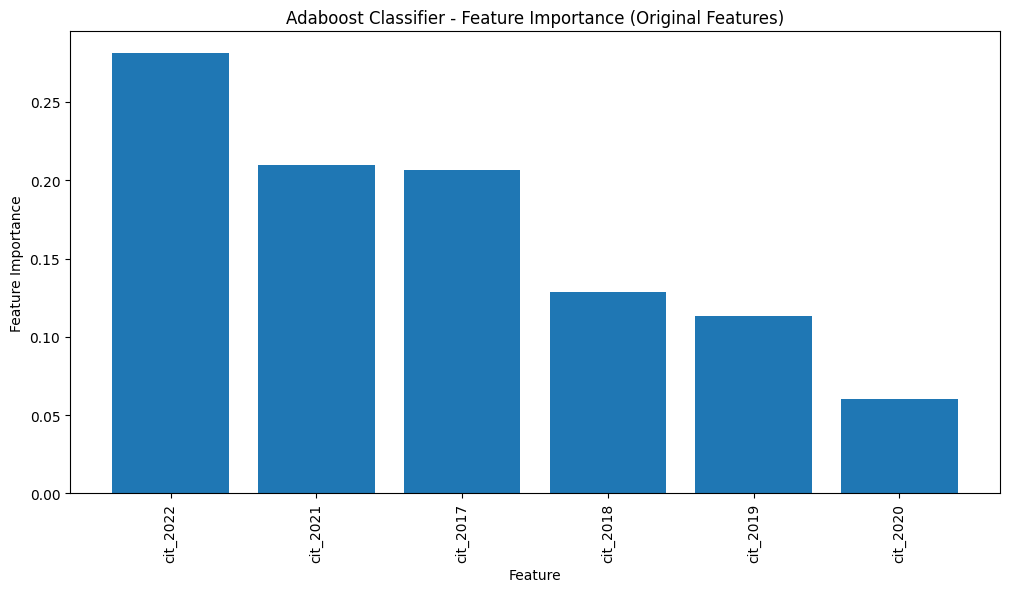

In [25]:
feature_importances = best_clf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Adaboost Classifier - Feature Importance (Original Features)")
plt.show()